In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\athar\\Downloads\\cicids18'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\athar\Downloads\cicids18\02-14-2018.csv
C:\Users\athar\Downloads\cicids18\02-15-2018.csv
C:\Users\athar\Downloads\cicids18\02-16-2018.csv
C:\Users\athar\Downloads\cicids18\02-21-2018.csv
C:\Users\athar\Downloads\cicids18\02-22-2018.csv
C:\Users\athar\Downloads\cicids18\02-23-2018.csv
C:\Users\athar\Downloads\cicids18\02-28-2018.csv
C:\Users\athar\Downloads\cicids18\03-01-2018.csv
C:\Users\athar\Downloads\cicids18\03-02-2018.csv


In [10]:
dataset_list = [
    pd.read_csv('C:\\Users\\athar\\Downloads\\cicids18\\02-14-2018.csv'),
    pd.read_csv('C:\\Users\\athar\\Downloads\\cicids18\\02-23-2018.csv'),
    pd.read_csv('C:\\Users\\athar\\Downloads\\cicids18\\03-01-2018.csv'),
    pd.read_csv('C:\\Users\\athar\\Downloads\\cicids18\\03-02-2018.csv')
]


C:\Users\athar\AppData\Local\Temp\ipykernel_8040\2255103397.py:4: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('C:\\Users\\athar\\Downloads\\cicids18\\03-01-2018.csv'),


In [11]:
df = pd.concat(dataset_list, ignore_index=True, axis=0)
del dataset_list # To save memory

In [12]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [13]:
df.shape

(3476850, 80)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476850 entries, 0 to 3476849
Data columns (total 80 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Dst Port           object
 1   Protocol           object
 2   Timestamp          object
 3   Flow Duration      object
 4   Tot Fwd Pkts       object
 5   Tot Bwd Pkts       object
 6   TotLen Fwd Pkts    object
 7   TotLen Bwd Pkts    object
 8   Fwd Pkt Len Max    object
 9   Fwd Pkt Len Min    object
 10  Fwd Pkt Len Mean   object
 11  Fwd Pkt Len Std    object
 12  Bwd Pkt Len Max    object
 13  Bwd Pkt Len Min    object
 14  Bwd Pkt Len Mean   object
 15  Bwd Pkt Len Std    object
 16  Flow Byts/s        object
 17  Flow Pkts/s        object
 18  Flow IAT Mean      object
 19  Flow IAT Std       object
 20  Flow IAT Max       object
 21  Flow IAT Min       object
 22  Fwd IAT Tot        object
 23  Fwd IAT Mean       object
 24  Fwd IAT Std        object
 25  Fwd IAT Max        object
 26  Fwd IAT Min   

In [15]:
df.isna().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

Label
Benign              2716056
Bot                  286191
FTP-BruteForce       193360
SSH-Bruteforce       187589
Infilteration         93063
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Label                    25
Name: count, dtype: int64


C:\Users\athar\AppData\Local\Temp\ipykernel_8040\776611456.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


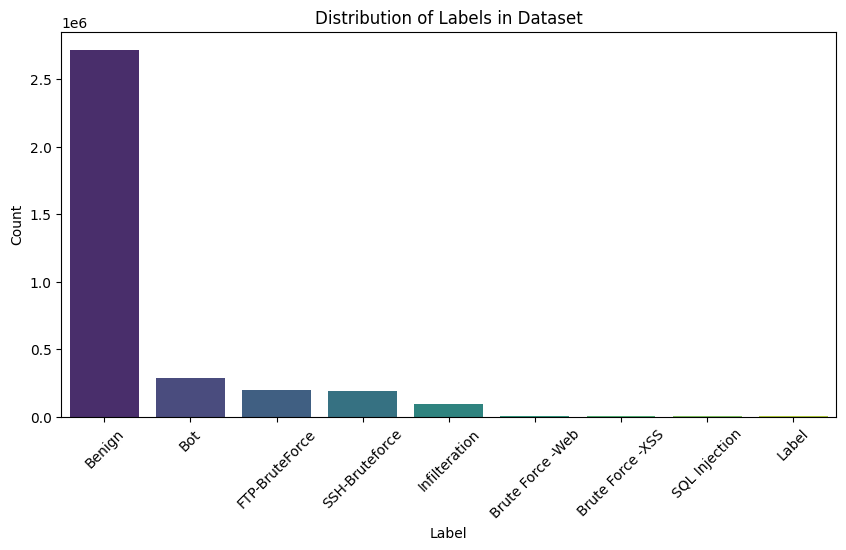

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique labels
label_counts = df['Label'].value_counts()

print(label_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels in Dataset")
plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
plt.show()

In [17]:
X = df.drop(columns=['Label'], axis=1)
y = df['Label']